In [93]:
with open('data/names.txt', 'r') as f:
    names_list = f.read().splitlines()

In [94]:
names_list[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

#### 1. Bigram

Use a two-character windows to slice the name. For example, after slicing the name 'emma', the result will be a list of tuples (e, m), (m, m) and (m, a). 

In [95]:
for n in names_list[:3]:
    for c1, c2 in zip(n, n[1:]):
        print(c1, c2)

e m
m m
m a
o l
l i
i v
v i
i a
a v
v a


In [96]:
# The zip iterator collects characters from each string 
# till characters in a shortest string are exhausted ('None' will be abandont)
print(list(zip("emma", "mma")))

[('e', 'm'), ('m', 'm'), ('m', 'a')]


In [97]:
# To denote the start and end of the string
# Add <S> to denote the start of the string 
# And <E> for the end
for name in names_list[:3]:
    name_chars = ['<S>'] + list(name) + ['<E>']
    for nc1, nc2 in zip(name_chars, name_chars[1:]):
        print(nc1, nc2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [98]:
# To represent the pattern of name, count the occuring times of a tuple
# Use a dictionary to record the counting for all names
occur_dict = {}
for name in names_list:
    name_chars = ['<S>'] + list(name) + ['<E>']
    for nc1, nc2 in zip(name_chars, name_chars[1:]):
        bigram = (nc1, nc2)
        # Counting the occuring time for a tuple
        occur_dict[bigram] = occur_dict.get(bigram, 0) + 1 

In [99]:
occur_dict

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [100]:
sorted(occur_dict.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [101]:
import torch

In [102]:
# Get all characters in the name_list
all_chars = sorted(list(set(''.join(names_list))))

In [103]:
# Encode and decode the alphabet using numbering 
# Also using the char '.' to replace the <S> and <E>, the '.' is denoted as 0
stoi = {s:i+1 for i, s in enumerate(all_chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [104]:
# Instead of using a dictionary to store these data, use a tensor to be the basic of the data structure
# The tensor is a 27 x 27 matrix, each entry will be the number of the occuring time of the pair
N = torch.zeros(len(stoi), len(stoi), dtype=torch.float32)

for n in names_list:
    name_str = ['.'] + list(n) + ['.']
    for c1, c2 in zip(name_str, name_str[1:]):
        first_idx = stoi[c1]
        second_idx = stoi[c2]
        N[first_idx][second_idx] += 1

(-0.5, 26.5, 26.5, -0.5)

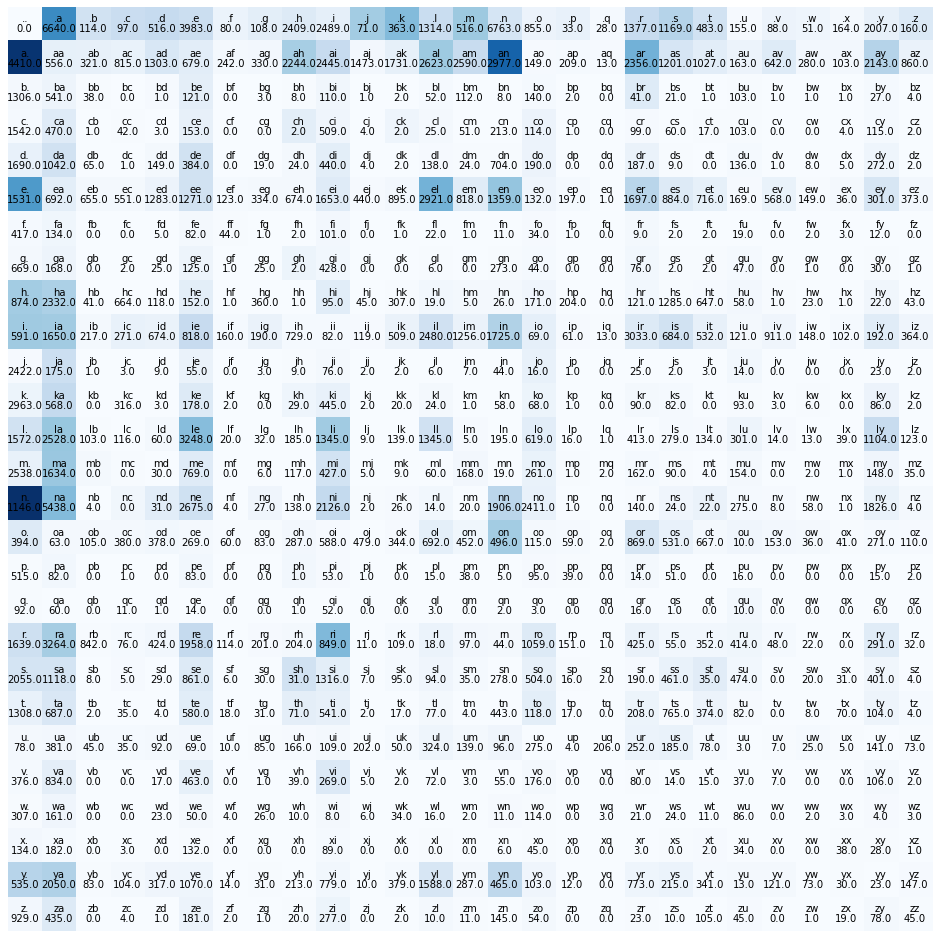

In [105]:
# Show all counting results on a grid mapping
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(17, 17))
plt.imshow(N, cmap='Blues')
for i in range(len(stoi)):
    for j in range(len(stoi)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="black")
        plt.text(j, i, N[j, i].item(), ha="center", va="top", color="black")
plt.axis('off')

In [106]:
# Select a row and then normalize it into a probability distribution
prob = N[0].float()
prob = prob / prob.sum()
prob

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [107]:
# Define the generator
generator = torch.Generator().manual_seed(2147483647)

# Sample from the probability list
result = torch.multinomial(prob, num_samples=1, replacement=True, generator=generator)
res_char = itos[result.item()]
res_char

'm'

In [108]:
# Normalize the matrix along the row
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [109]:
g = torch.Generator().manual_seed(9992839)

for i in range(10):
    ix = 0 # The start token of the generated name
    generated_name = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix != 0: # If not reach the end token, then keep appending all chars
            generated_name.append(itos[ix])
        else: # The end token of the generated name
            break

    print(''.join(generated_name))

jush
tosah
asiaizaishmin
camah
miayaizoserlanioriushen
nn
a
mabehra
s
in


In [110]:
# Loss function: maximize of likelihood of the data w.r.t model parameters (statistical modeling)
# => maximize the log(likelihood) since the log function is monotonic
# => minimize the negative log(likelihood)
# => minimize the average negative log(likelihood)
log_likelihood = 0.0
count = 0

for n in names_list:
# for n in ['haoxuan']:
    name_str = ['.'] + list(n) + ['.']
    for c1, c2 in zip(name_str, name_str[1:]):
        prob = P[stoi[c1], stoi[c2]]
        log_likelihood += torch.log(prob)
        count += 1

# print('log likelihood: {}'.format(log_likelihood))
# print('negative log likelihood: {}'.format(-log_likelihood))
print('averaged negative log likelihodd: {}'.format(-log_likelihood / count))

averaged negative log likelihodd: 2.4543561935424805
